In [1]:
from SimPEG import Utils
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from simpegEMIP import SeogiUtils

In [3]:
xy = SeogiUtils.View.Circle2D(np.r_[0., 0.], 13, 7)
x_obs, y_obs = 0, 0.

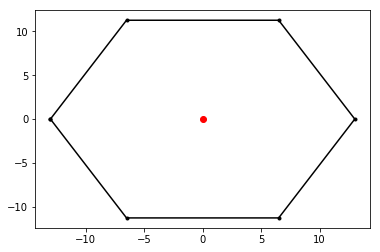

In [4]:
plt.plot(xy[:,0], xy[:,1], 'k.-')
plt.plot(x_obs, y_obs, 'ro')

In [5]:
xy_obs = [x_obs, y_obs]

def rotate_origin_only(xy, radians):
    """Only rotate a point around the origin (0, 0)."""
    xx = xy[:,0] * np.cos(radians) + xy[:,1] * np.sin(radians)
    yy = -xy[:,0] * np.sin(radians) + xy[:,1] * np.cos(radians)
    return np.c_[xx, yy]

def rotate_to_x_axis(xy, observation_point):
    """
    Moves each of two sequential points to origin (0,0)
    then rotate to x-axis
    """
    n_pts = xy.shape[0]
    dxy = np.empty((n_pts-1, 2), dtype=float, order='F')    
    dxy_obs = np.empty((n_pts-1, 2), dtype=float, order='F')        
    angle = np.empty(n_pts-1, dtype=float)        
    dxy = np.diff(xy, axis=0)
    print (dxy)    
    dxy_obs = observation_point.repeat(n_pts-1).reshape((2,n_pts-1)).T
    angle = np.arctan2(dxy[:,1], dxy[:,0])
    # this is for self-check
    xy_rot = rotate_origin_only(dxy, angle)
    xy_obs_rot = rotate_origin_only(dxy_obs, angle)    
    
    # For computation of Hx, Hy angle is required
    # Hx: hx cos theta + hy sin theta
    # Hy: hx sin theta - hy cos theta   
    # Hz: hz
    return xy_rot, xy_obs_rot, angle

In [6]:
xy_rot, xy_obs_rot, angle = rotate_to_x_axis(np.flipud(xy), np.r_[x_obs, y_obs])

[[ 6.50000000e+00  1.12583302e+01]
 [ 1.30000000e+01 -7.10542736e-15]
 [ 6.50000000e+00 -1.12583302e+01]
 [-6.50000000e+00 -1.12583302e+01]
 [-1.30000000e+01  1.77635684e-15]
 [-6.50000000e+00  1.12583302e+01]]


In [7]:
np.rad2deg(angle)

array([ 6.00000000e+01, -3.13162307e-14, -6.00000000e+01, -1.20000000e+02,
        1.80000000e+02,  1.20000000e+02])

(-20, 20)

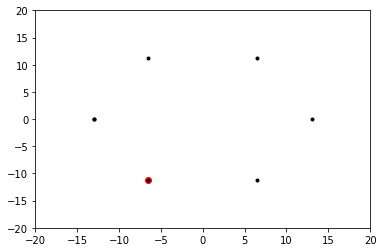

In [8]:
i=5
# plt.plot(dx, dy, 'k.')
# plt.plot(dx[i], dy[i], 'ro', ms=10)
# plt.plot(np.r_[0, x_rot[i]], np.r_[0, y_rot[i]], 'b->')

plt.plot(np.flipud(xy)[i,0], np.flipud(xy)[i,1], 'ro')
plt.plot(xy[:,0], xy[:,1], 'k.')
# plt.plot(xy_rot[:,0], xy_rot[:,1], 'ko')
# plt.plot(xy_obs_rot[:,0], xy_obs_rot[:,1], 'bx', ms=10)
plt.xlim(-20, 20)
plt.ylim(-20, 20)